In [205]:
# set up the environment
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from arch.bootstrap import IIDBootstrap
import seaborn as sns

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [206]:
with open('Lee2008.csv') as f:
    lee = pd.read_table(f,delimiter=',')
lee=lee.drop("Unnamed: 0", axis=1)
lee=lee[(lee.y!=0.0) & (lee.y!=1.0) & (lee.x!=-1.0) & (lee.x!=1.0)]

Text(0,0.5,u'Dem share t+1')

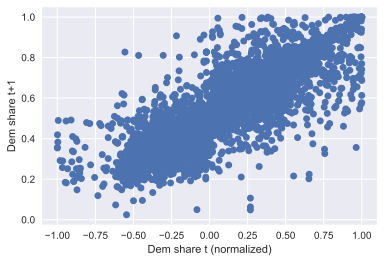

In [207]:
plot(lee.x,lee.y,'o')
xlabel('Dem share t (normalized)')
ylabel('Dem share t+1')

In [208]:
print 'Average share of vote for incumbents =',lee.y[lee.x>0].mean()
print 'Average share of vote for non-incumbents =',lee.y[lee.x<=0].mean()
print 'Difference =',lee.y[lee.x>0].mean()-lee.y[lee.x<=0].mean()

Average share of vote for incumbents = 0.647070306829
Average share of vote for non-incumbents = 0.383934458333
Difference = 0.263135848496


In [209]:
print 'Prob winning for incumbents =',(lee.y[lee.x>0]>0.5).mean()
print 'Prob winning for non-incumbents =',(lee.y[lee.x<=0]>0.5).mean()
print 'Difference =',(lee.y[lee.x>0]>0.5).mean()-(lee.y[lee.x<=0]>0.5).mean()
print 'Ratio =',(lee.y[lee.x>0]>0.5).mean()/(lee.y[lee.x<=0]>0.5).mean()


Prob winning for incumbents = 0.894094358298
Prob winning for non-incumbents = 0.0933333333333
Difference = 0.800761024964
Ratio = 9.57958241033


In [210]:
lm=smf.ols('y ~ x + I(x>0)',data=lee).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     6190.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:05:55   Log-Likelihood:                 4970.9
No. Observations:                5431   AIC:                            -9936.
Df Residuals:                    5428   BIC:                            -9916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4597      0.002    184.581      0.000       0.455       0.465
I(x > 0)[T.True]     0.0864      0.004     19.563      0.000       0.078       0.095
x                    0.3110      0.006     50.058      0.000       0.299       0.323
==============================================================================
Omnibus:                      434.827   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2359.648
Skew:                           0.154   Prob(JB):                         0.00
Kurtosis:                       6.214   Cond. No.                         6.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

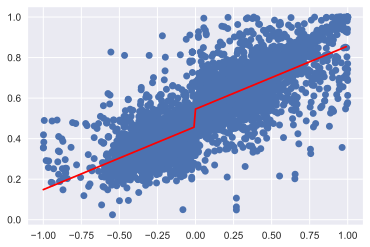

In [211]:
plot(lee.x,lee.y,'o')
plot(np.arange(-1,1,.01),lm.predict(pd.DataFrame(np.arange(-1,1,.01),columns=['x'])),'r-')


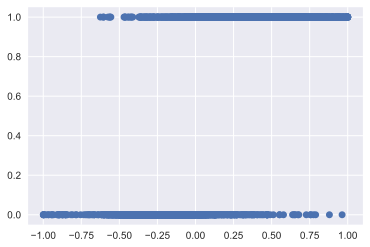

In [212]:
plot(lee.x,lee.y>.5,'o')

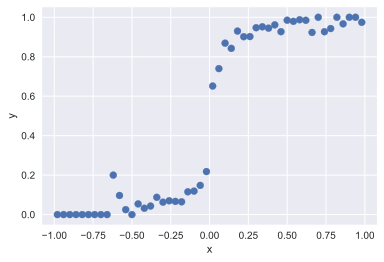

In [213]:
d=0.04
sns.regplot(x=lee.x, y=lee.y>0.5, x_bins=np.arange(-1+d/2,1,d), fit_reg=False, ci=None)


In [214]:
logit=smf.glm('I(y<0.5) ~ x + I(x>0)',data=lee,family=sm.families.Binomial()).fit()
logit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['I(y < 0.5)[False]', 'I(y < 0.5)[True]']   No. Observations:                 5431
Model:                                                   GLM   Df Residuals:                     5428
Model Family:                                       Binomial   Df Model:                            2
Link Function:                                         logit   Scale:                             1.0
Method:                                                 IRLS   Log-Likelihood:                -1633.0
Date:                                       Wed, 18 Apr 2018   Deviance:                       3265.9
Time:                                               16:09:25   Pearson chi2:                 6.11e+03
No. Iterations:                                            6                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3869      0.088    -15.795      0.000      -1.559      -1.215
I(x > 0)[T.True]     2.4271      0.144     16.801      0.000       2.144       2.710
x                    4.4823      0.319     14.045      0.000       3.857       5.108
====================================================================================
"""

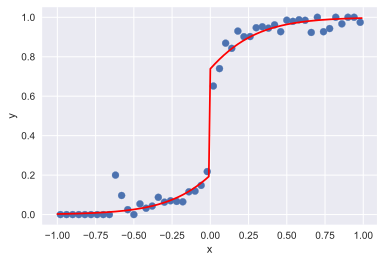

In [215]:
sns.regplot(x=lee.x, y=lee.y>0.5, x_bins=np.arange(-1+d/2,1,d), fit_reg=False, ci=None)
plot(np.arange(-1,1,.01),logit.predict(pd.DataFrame(np.arange(-1,1,.01),columns=['x'])),'r-')


In [216]:
v=logit.predict(pd.DataFrame([0,1e-30],columns=['x']))
v[1]-v[0]

0.53898331241186037

In [217]:
print 'Prob winning for x in [0, 0.05] =',(lee.y[(lee.x>0)&(lee.x<0.05)]>0.5).mean()
print 'Prob winning for x in [-0.05,0] =',(lee.y[(lee.x<=0)&(lee.x>-0.05)]>0.5).mean()
print 'Difference =',(lee.y[(lee.x>0)&(lee.x<0.05)]>0.5).mean()-(lee.y[(lee.x<=0)&(lee.x>-0.05)]>0.5).mean()


Prob winning for x in [0, 0.05] = 0.668789808917
Prob winning for x in [-0.05,0] = 0.195804195804
Difference = 0.472985613113


/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


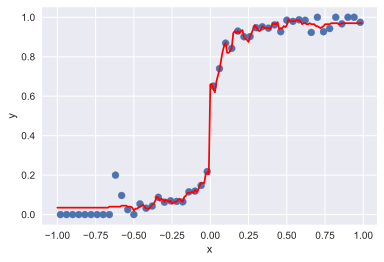

In [219]:
from sklearn import neighbors
sns.regplot(x=lee.x, y=lee.y>0.5, x_bins=np.arange(-1+d/2,1,d), fit_reg=False, ci=None)
plot(np.arange(-1,1,.01), np.hstack((
    neighbors.KNeighborsRegressor(n_neighbors=200).fit(lee.x[lee.x<0].reshape(-1,1),lee.y[lee.x<0]>.5).predict(np.arange(-1,0,.01).reshape(-1,1)),
    neighbors.KNeighborsRegressor(n_neighbors=200).fit(lee.x[lee.x>0].reshape(-1,1),lee.y[lee.x>0]>.5).predict(np.arange(0, 1,.01).reshape(-1,1))
)),'r')


In [220]:
k = 50
print 'Difference per kNN =',(
    (lee.y[(lee.x>0) & (lee.x<=sorted(lee.x[lee.x>0])[k])]>0.5).mean() -
    (lee.y[(lee.x<=0) & (lee.x>=sorted(lee.x[lee.x<=0])[-k])]>0.5).mean()
)

Difference per kNN = 0.585098039216
